In Theory Part 1, we discussed the construction of a simple neural network, specifically a multilayer perceptron (MLP), and introduced the concept of loss function —— a quantitative measure of the discrepancy between the model's predictions and the actual outcomes.

A natural progression from this discussion leads us to a pivotal question: How can we reduce the loss value to enhance the model's predictive accuracy? This inquiry brings us to the central theme of this section —— **neural network learning**. In this context, "learning" refers to the process by which a neural network autonomously adjusts its internal parameters, such as weights and biases, based on training data. The objective is to minimize the loss function, thereby improving the model's performance on unseen data. This optimization is typically achieved through iterative algorithms like gradient descent, which systematically update the parameters to reduce the loss.

To illustrate this learning process, we will employ an MLP to fit a simple bivariate linear equation. This example will demonstrate how adjusting the network's parameters can effectively minimize the loss function, providing a foundational understanding of neural network training.

# Linear Function and Training Data

To deepen our understanding of how neural networks learn, we'll explore how a simple neural network can approximate a linear function of two variables:

$y=a·x_0+b·x_1+c$

In this equation, $a$, $b$ are the weights associated with inputs $x_0$, $x_1$, respectively, while $c$ represents the bias term (analogous to the intercept in linear regression models).

For simplicity, we'll set the parameters to $(a,b,c)=(1,1,0)$, reducing the target function to:

$y=x_0+x_1$

We generate a training dataset by randomly sampling 10 pairs of $(x_0,x_1)$ values. For each pair, we compute the corresponding output $y$ using the target function $y=x_0+x_1$. These computed outputs serve as the ground truth labels for training our neural network model.

In [1]:
import random
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the target linear model: y = a * x0 + b * x1 + c
def liniear_model(input):
    a, b, c = 1, 1, 0  # Weights and bias
    output = a * input[0] + b * input[1] + c
    return output

# Generate 10 random samples with values between -10 and 10, rounded to 2 decimal places
num_samples = 10
x0_list = [round(random.uniform(-10, 10), 2) for _ in range(num_samples)]
x1_list = [round(random.uniform(-10, 10), 2) for _ in range(num_samples)]
inputs = np.array(list(zip(x0_list, x1_list)))

# Calculate the corresponding output values using the target linear model
outputs_true = [liniear_model([x0_list[i], x1_list[i]]) for i in range(num_samples)]

# Display the input-output pairs
for i in range(num_samples):
    print(f"For input: {inputs[i]} we wanted to get {outputs_true[i]}")

For input: [-3.    3.48] we wanted to get 0.48
For input: [ 0.55 -6.29] we wanted to get -5.74
For input: [ 0.43 -1.53] we wanted to get -1.1
For input: [-0.81  1.59] we wanted to get 0.78
For input: [-2.79  5.51] we wanted to get 2.7199999999999998
For input: [-9.75 -4.94] we wanted to get -14.690000000000001
For input: [ 7.65 -4.53] we wanted to get 3.12
For input: [ 1.53 -3.46] we wanted to get -1.93
For input: [ 9.81 -8.  ] we wanted to get 1.8100000000000005
For input: [9.88 8.11] we wanted to get 17.990000000000002


To gain a clearer understanding of the relationship between our sampled training data and the underlying linear function, we can create a visual representation. By plotting the generated data points alongside the graph of the true function, we can observe how well the data aligns with the expected linear relationship.

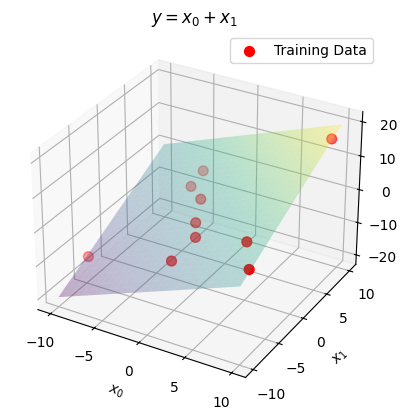

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create grid data for x0 and x1 (to plot the plane)
x0 = np.linspace(-10, 10, 30)
x1 = np.linspace(-10, 10, 30)
x0_grid, x1_grid = np.meshgrid(x0, x1)
y_grid = x0_grid + x1_grid  # Plane for y = x0 + x1

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x0_grid, x1_grid, y_grid, alpha=0.3, cmap='viridis', edgecolor='none')
ax.scatter(x0_list, x1_list, outputs_true, color='red', s=50, label='Training Data')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('y')
ax.set_title(r'$y = x_0 + x_1$')
ax.legend()
plt.show()

# Fitting Linear Function Using a Neural Network

In Theory part, we constructed a MLP. To gain a deeper understanding of its capabilities, we now aim to apply this MLP to fit the simple linear equation $y=x_0+x_1$.

We provide the MLP with a set of ideal model parameters. With these parameters, the MLP should be able to produce output results identical to those of the target linear equation. This exercise serves as a foundational step in understanding how the MLP processes input data and adjusts its parameters to minimize the loss function, thereby learning to approximate the desired relationship.

In [6]:
import numpy as np

def toy_MLP_with_activations(input, weights, bias, activation_function=None):
    """
    A toy example of a multilayer perceptron, two inputs x1 and x2, one hidden layer with two neurons, and one output layer with one neuron.
    Also uses activation functions of your choosing
    Manually assigned weights and biases:
    """
    # These just check the inputs, weights and biases are the right shape/size
    assert input.shape == (2,), "Inputs are the wrong shape"
    assert weights.shape == (6,), "Weights are the wrong shape"
    assert bias.shape == (3,), "Biases are the wrong shape"
    # assert activation_function in [None, sigmoid, relu, tanh], "Please choose a valid activation function from [None, sigmoid, relu, tanh]"

    # If the activation function is None, we just use the identity function
    if activation_function is None:
        activation_function = lambda x: x

    # We feed the inputs into the hidden layer and calculate the outputs which then get fed into the output layer
    hidden_layer = [activation_function(input[0] * weights[0] + input[1] * weights[1] + bias[0]),
                    activation_function(input[0] * weights[2] + input[1] * weights[3] + bias[1])]
    # print(hidden_layer[0], hidden_layer[1])

    # The output of the hidden layer is then fed into the output layer
    output = hidden_layer[0] * weights[4] + hidden_layer[1] * weights[5] + bias[2]
    # print(output)
    return output

def loss_function(y_true, y_pred):
    """
    Calculate the Sum of Squared Residuals (SSR)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    residuals = y_true - y_pred
    ssr = np.sum(residuals ** 2)
    return ssr

def evaluate_model(inputs, weights, bias, outputs_true):
    """
    Evaluate the model on the given inputs and outputs.
    """
    outputs_pred=np.array([])
    for i in range(num_samples):
        output = toy_MLP_with_activations(inputs[i], weights, bias)
        outputs_pred=np.append(outputs_pred,output)
        print(f"For input: {inputs[i]} we wanted to get {outputs_true[i]} and got {output}")
    return loss_function(outputs_true, outputs_pred)/num_samples

# Ideal model parameters
weights = np.array([1, 1, 0, 0, 1, 0])
bias = np.array([0, 0, 0])

# Calculate loss
loss=evaluate_model(inputs, weights, bias, outputs_true)
print('Loss:',loss)

For input: [-3.    3.48] we wanted to get 0.48 and got 0.48
For input: [ 0.55 -6.29] we wanted to get -5.74 and got -5.74
For input: [ 0.43 -1.53] we wanted to get -1.1 and got -1.1
For input: [-0.81  1.59] we wanted to get 0.78 and got 0.78
For input: [-2.79  5.51] we wanted to get 2.7199999999999998 and got 2.7199999999999998
For input: [-9.75 -4.94] we wanted to get -14.690000000000001 and got -14.690000000000001
For input: [ 7.65 -4.53] we wanted to get 3.12 and got 3.12
For input: [ 1.53 -3.46] we wanted to get -1.93 and got -1.93
For input: [ 9.81 -8.  ] we wanted to get 1.8100000000000005 and got 1.8100000000000005
For input: [9.88 8.11] we wanted to get 17.990000000000002 and got 17.990000000000002
Loss: 0.0


# Exploring the Impact of Parameter Adjustment on Loss Landscape

We demonstrated that with ideal model parameters, the MLP perfectly approximates the target linear function, resulting in a loss value of 0. However, in practical scenarios, the model parameters are rarely set to such optimal values. This discrepancy leads us to investigate how variations in parameter initialization influence the loss landscape and, consequently, the model's performance.

We can use the following code to adjust the model parameters $w_0$ and $w_1$  and observe the resulting changes in the loss function.

In [7]:
import numpy as np

# Change the values of w0 and w1 to observe the losses
w0,w1=1.1,0.9

weights = np.array([w0, w1, 0, 0, 1, 0])
bias = np.array([0, 0, 0])

# Calculate loss
loss=evaluate_model(inputs, weights, bias, outputs_true)
print('Loss:',loss)

For input: [-3.    3.48] we wanted to get 0.48 and got -0.16800000000000015
For input: [ 0.55 -6.29] we wanted to get -5.74 and got -5.056
For input: [ 0.43 -1.53] we wanted to get -1.1 and got -0.9039999999999999
For input: [-0.81  1.59] we wanted to get 0.78 and got 0.5399999999999999
For input: [-2.79  5.51] we wanted to get 2.7199999999999998 and got 1.8899999999999992
For input: [-9.75 -4.94] we wanted to get -14.690000000000001 and got -15.171000000000003
For input: [ 7.65 -4.53] we wanted to get 3.12 and got 4.338000000000001
For input: [ 1.53 -3.46] we wanted to get -1.93 and got -1.4309999999999996
For input: [ 9.81 -8.  ] we wanted to get 1.8100000000000005 and got 3.591000000000002
For input: [9.88 8.11] we wanted to get 17.990000000000002 and got 18.167
Loss: 0.683985200000001


To further investigate the influence of parameter adjustments on the loss landscape, we can examine the effect of varying the weight $w_0$ while keeping other parameters constant. This analysis allows us to observe how changes in $w_0$ impact the loss function, providing insights into the sensitivity of the model's performance to this specific parameter.

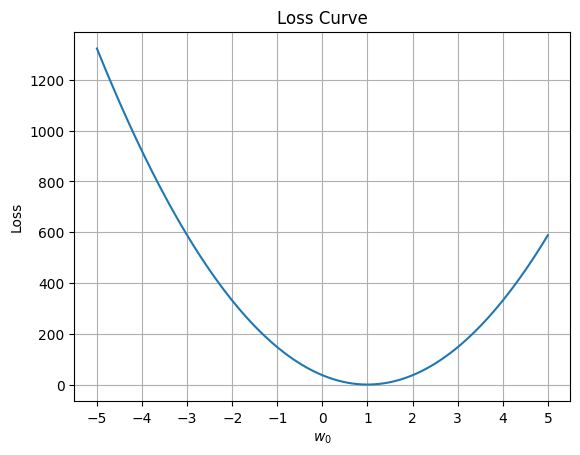

In [11]:
import numpy as np

def evaluate_model(inputs, weights, bias, outputs_true):
    outputs_pred=np.array([])
    for i in range(num_samples):
        output = toy_MLP_with_activations(inputs[i], weights, bias)
        outputs_pred=np.append(outputs_pred,output)
        # print(f"For input: {inputs[i]} we wanted to get {outputs_true[i]} and got {output}")
    return loss_function(outputs_true, outputs_pred)/num_samples

# Set the range for w0
w0_values = np.linspace(-5, 5, 100)
loss_values = []
for w0 in w0_values:
    # Change only w0 value, keep other weights fixed
    weights = np.array([w0, 1, 0, 0, 1, 0])
    loss = evaluate_model(inputs, weights, bias, outputs_true)
    loss_values.append(loss)

# Plot the relationship between loss and w0
plt.plot(w0_values, loss_values)
plt.xlabel("$w_0$")
plt.ylabel("Loss")
plt.title('Loss Curve')
plt.xticks(np.arange(-5, 6, 1))
plt.grid(True)
plt.show()

The above figure indicates that as the value of $w_0$ approaches 1, the loss function of the MLP decreases, bringing the model's outputs closer to the true values.

To further understand the behavior of our MLP, we can explore how simultaneous adjustments to the weights $w_0$ and $w_1$ influence the loss function. This examination provides a two-dimensional perspective of the loss landscape, offering insights into the identification of regions where the loss is minimized.

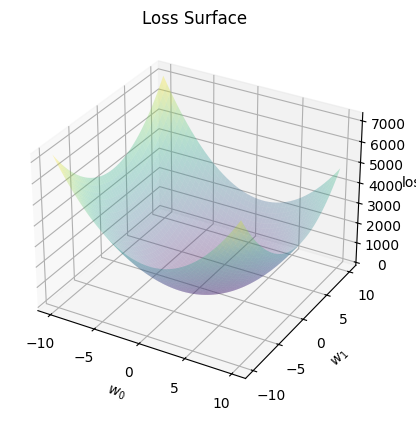

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a range of values for weights w0 and w1
w0_values = np.linspace(-10, 10, 50)  # 50 values from -10 to 10 for w0
w1_values = np.linspace(-10, 10, 50)  # 50 values from -10 to 10 for w1

# Create a grid of w0 and w1 values
W0, W1 = np.meshgrid(w0_values, w1_values)

# Initialize an array to store loss values corresponding to each (w0, w1) pair
loss_values = np.zeros(W0.shape)

# Compute the loss for each (w0, w1) combination while keeping other weights fixed
for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        # Only change w0 and w1
        weights = np.array([W0[i, j], W1[i, j], 0, 0, 1, 0])
        # Evaluate the model's loss with the current set of weights
        loss = evaluate_model(inputs, weights, bias, outputs_true)
        loss_values[i, j] = loss

# Create a 3D plot to visualize the loss surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, loss_values, cmap='viridis', alpha=0.3)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('loss')
ax.set_title('Loss Surface')
plt.show()

​As the weights $w_0$ and $w_1$ approach 1, the MLP model's predictions align more closely with the true values, resulting in a decreased loss.

# Gradient Descent

We have obtained the loss landscape by adjusting different parameters. Our goal is to find the minimum loss value, so that the MLP output is as close as possible to the true result. In other words, we need to find the lowest point in the loss curve or loss surface.

Imagine the loss function as a landscape with hills and valleys, where the goal is to find the lowest valley point—the global minimum. We can achieve this by computing the partial derivative of the loss with respect to the weight, which tells us how steep the surface is and in which direction to move. This process is analogous to descending a mountain by always taking steps in the direction of the steepest descent, which can be achieved by **Gradient descent**.

Gradient Descent is an iterative optimization algorithm used to minimize a loss function by adjusting the model's parameters in the direction that reduces the loss. The core idea is to compute the gradient (partial derivatives) of the loss function with respect to each parameter and update the parameters in the opposite direction of the gradient.

Consider a simple scenario where we have parameters $w_0$ and $w_1$ and we aim to find its optimal value that minimizes the loss function $L$. We compute the partial derivative of the loss function with respect to $w_0$, which tells us the direction to move in. Then, we update $w_0$ using a learning rate $\eta$, which determines the step size for each update. The update formula is as follows:

$w_0 = w_0 - \eta \frac{\partial L}{\partial w_0}$

Similarly, the update formula for $w_1$ is:

$w_1 = w_1 - \eta \frac{\partial L}{\partial w_1}$

The choice of the learning rate $\eta$ is crucial: A small $\eta$ may lead to slow convergence, requiring more iterations to reach the minimum. A large $\eta$ might cause the algorithm to overshoot the minimum or even diverge. For a more in-depth understanding of Gradient Descent and learning rate, you may refer to https://cs231n.github.io/neural-networks-3/#sanitycheck.

​To illustrate how to adjust the weight $w_0$ using gradient descent, we can implement a simple Python example. This example demonstrates how computing the partial derivative of the loss function with respect to $w_0$ enables the model to move towards the minimum point of the loss curve.

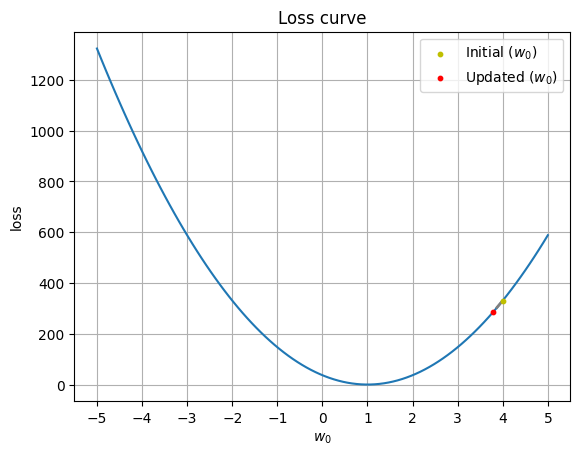

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the numerical gradient of the loss function with respect to w0
def compute_gradient_w0(w0, inputs, outputs_true, bias, epsilon=1e-5):
    # Set current weights with w0
    weights = np.array([w0, 1, 0, 0, 1, 0])
    loss = evaluate_model(inputs, weights, bias, outputs_true)
    # Slightly perturb w0 by a small epsilon
    weights_eps = np.array([w0 + epsilon, 1, 0, 0, 1, 0])
    loss_eps = evaluate_model(inputs, weights_eps, bias, outputs_true)
    # Approximate the gradient using finite difference method
    return (loss_eps - loss) / epsilon

# Gradient Descent Step
w0_init = 4
learning_rate = 0.001

# Compute initial loss using current w0
weights_init = np.array([w0_init, 1, 0, 0, 1, 0])
loss_init=evaluate_model(inputs, weights_init, bias, outputs_true)

# Compute the gradient of the loss with respect to w0
grad = compute_gradient_w0(w0_init, inputs, outputs_true, bias=np.array([0, 0, 0]))

# Update w0 using gradient descent rule
w0_updated = w0_init - learning_rate * grad
weights_updated = np.array([w0_updated, 1, 0, 0, 1, 0])
loss_updated=evaluate_model(inputs, weights_updated, bias, outputs_true)

# Visualize the Loss Curve
w0_values = np.linspace(-5, 5, 100)
loss_values = []
for w0 in w0_values:
    weights = np.array([w0, 1, 0, 0, 1, 0])
    loss = evaluate_model(inputs, weights, bias, outputs_true)
    loss_values.append(loss)
plt.plot(w0_values, loss_values)
plt.scatter(w0_init, loss_init, color='y', s=10, label='Initial ($w_0$)', zorder=6)
plt.scatter(w0_updated, loss_updated, color='r', s=10, label='Updated ($w_0$)', zorder=5)
plt.plot([w0_init, w0_updated],  [loss_init, loss_updated], color='gray', linestyle='--', linewidth=2, zorder=3)
plt.xlabel("$w_0$")
plt.ylabel("loss")
plt.title('Loss curve')
plt.xticks(np.arange(-5, 6, 1))
plt.grid(True)
plt.legend()
plt.show()

To demonstrate how to adjust both $w_0$ and $w_1$ using gradient descent, we can implement a Python example that computes the partial derivatives of the loss function with respect to these weights. This approach enables the model to move towards the minimum point of the loss surface.

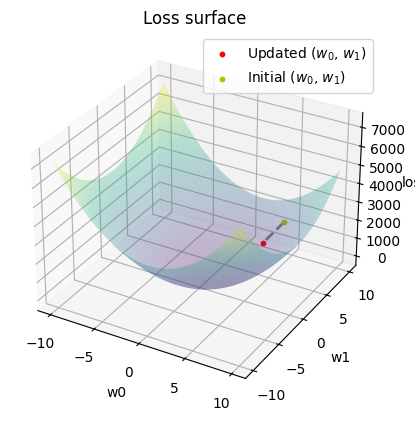

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to compute the numerical gradients of the loss function
# with respect to w0 and w1 using finite differences
def compute_gradient_w0_w1(w0, w1, inputs, outputs_true, bias, epsilon=1e-5):
    # Define base weights (only w0 and w1 are variable, others are fixed)
    weights = np.array([w0, w1, 0, 0, 1, 0])
    loss = evaluate_model(inputs, weights, bias, outputs_true)
    # Compute gradient with respect to w0
    weights_w0_eps = np.array([w0 + epsilon, w1, 0, 0, 1, 0])
    loss_w0_eps = evaluate_model(inputs, weights_w0_eps, bias, outputs_true)
    grad_w0 = (loss_w0_eps - loss) / epsilon
    # Compute gradient with respect to w1
    weights_w1_eps = np.array([w0, w1 + epsilon, 0, 0, 1, 0])
    loss_w1_eps = evaluate_model(inputs, weights_w1_eps, bias, outputs_true)
    grad_w1 = (loss_w1_eps - loss) / epsilon
    return grad_w0, grad_w1

# Gradient Descent Step
# Initial weight values for w0, w1, and learning rate
w0_init = 5
w1_init = 8
learning_rate = 0.005

# Evaluate initial loss
weights_init = np.array([w0_init, w1_init, 0, 0, 1, 0])
loss_init=evaluate_model(inputs, weights_init, bias, outputs_true)

# Compute gradients at the initial point
grad_w0,grad_w1 = compute_gradient_w0_w1(w0, w1_init,inputs, outputs_true, bias=np.array([0, 0, 0]))

# Apply one step of gradient descent to update w0 and w1
w0_updated = w0_init - learning_rate * grad_w0
w1_updated = w1_init - learning_rate * grad_w1
weights_updated = np.array([w0_updated, w1_updated, 0, 0, 1, 0])
loss_updated=evaluate_model(inputs, weights_updated, bias, outputs_true)

# Generate a range of values for weights w0 and w1
w0_values = np.linspace(-10, 10, 50)  # 50 values from -10 to 10 for w0
w1_values = np.linspace(-10, 10, 50)  # 50 values from -10 to 10 for w1

# Create a grid of w0 and w1 values
W0, W1 = np.meshgrid(w0_values, w1_values)

# Initialize an array to store loss values corresponding to each (w0, w1) pair
loss_values = np.zeros(W0.shape)

# Compute the loss for each (w0, w1) combination while keeping other weights fixed
for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        # Only change w0 and w1
        weights = np.array([W0[i, j], W1[i, j], 0, 0, 1, 0])
        # Evaluate the model's loss with the current set of weights
        loss = evaluate_model(inputs, weights, bias, outputs_true)
        loss_values[i, j] = loss

# Plot the 3D loss surface and gradient descent step
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, loss_values, cmap='viridis', alpha=0.3)
ax.scatter(w0_updated, w1_updated, loss_updated, color='r', s=10, label='Updated ($w_0$, $w_1$)', zorder=5)
ax.scatter(w0_init, w1_init, loss_init, color='y', s=10, label='Initial ($w_0$, $w_1$)', zorder=6)
ax.plot([w0_init, w0_updated], [w1_init, w1_updated], [loss_init, loss_updated], color='gray', linestyle='--', linewidth=2, zorder=3)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')
ax.set_title('Loss surface')
plt.legend()
plt.show()